# **Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

# **Loading the data**

In [ ]:
data = pd.read_csv('ratings.csv')

In [ ]:
data.sample(3)

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
927,tt8852558,8,3/8/2020,Mitron,https://www.imdb.com/title/tt8852558/,movie,6.9,119.0,2018,Comedy,2629,9/14/2018,Nitin Kakkar
447,tt0252866,8,9/14/2019,American Pie 2,https://www.imdb.com/title/tt0252866/,movie,6.4,108.0,2001,Comedy,265067,8/6/2001,J.B. Rogers
851,tt7618184,9,12/28/2018,Mulk,https://www.imdb.com/title/tt7618184/,movie,7.3,140.0,2018,Drama,21456,8/2/2018,Anubhav Sinha


In [ ]:
imdb = data.copy()    #operations are performed on the copied dataframe, so that original data remains unchanged

In [ ]:
imdb.shape    #tuple of (number of rows,number of columns)

(995, 13)

In [ ]:
imdb.info()   #information about non-null count and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Const           995 non-null    object 
 1   Your Rating     995 non-null    int64  
 2   Date Rated      995 non-null    object 
 3   Title           995 non-null    object 
 4   URL             995 non-null    object 
 5   Title Type      995 non-null    object 
 6   IMDb Rating     995 non-null    float64
 7   Runtime (mins)  986 non-null    float64
 8   Year            995 non-null    int64  
 9   Genres          995 non-null    object 
 10  Num Votes       995 non-null    int64  
 11  Release Date    995 non-null    object 
 12  Directors       875 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 101.2+ KB


# **Data Cleaning**

In [ ]:
imdb.drop(['URL'], axis=1, inplace= True)   #deleting the 'URL' column permanently

In [ ]:
imdb.sample()

,Const,Your Rating,Date Rated,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
318,tt1790885,8,10/5/2016,Zero Dark Thirty,movie,7.4,157.0,2012,"Drama, History, Thriller, War",312203,12/10/2012,Kathryn Bigelow


In [ ]:
imdb.rename(columns= {'Const':'Id'}, inplace=True)

In [ ]:
imdb.sample()

,Id,Your Rating,Date Rated,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
849,tt7581552,8,8/5/2019,Unda,movie,7.7,130.0,2019,"Action, Comedy, Thriller",4430,6/14/2019,Khalid Rahman


In [ ]:
imdb.drop(['Release Date'], axis=1, inplace= True)    #Deleting the 'Release Date' column permanently

In [ ]:
imdb.sample()

,Id,Your Rating,Date Rated,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Directors
235,tt14418234,9,7/9/2021,State of Siege: Temple Attack,movie,7.7,110.0,2021,"Action, Thriller",9577,Ken Ghosh


In [ ]:
imdb['Runtime (mins)'].fillna(45, inplace=True)   #handling the null values in the 'Runtime (mins)' columns with value based on domain knowledge

In [ ]:
imdb['Directors'] = imdb['Directors'].fillna('Not Available')   #handle null values in 'Directors' column by replacing with 'Not Available'

In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              995 non-null    object 
 1   Your Rating     995 non-null    int64  
 2   Date Rated      995 non-null    object 
 3   Title           995 non-null    object 
 4   Title Type      995 non-null    object 
 5   IMDb Rating     995 non-null    float64
 6   Runtime (mins)  995 non-null    float64
 7   Year            995 non-null    int64  
 8   Genres          995 non-null    object 
 9   Num Votes       995 non-null    int64  
 10  Directors       995 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 85.6+ KB


In [ ]:
imdb.isnull().sum()   #checking for null values

Id                0
Your Rating       0
Date Rated        0
Title             0
Title Type        0
IMDb Rating       0
Runtime (mins)    0
Year              0
Genres            0
Num Votes         0
Directors         0
dtype: int64

# **Exploratory Data Analysis (EDA)**

In [ ]:
imdb.describe()   #for basic analysis

,Your Rating,IMDb Rating,Runtime (mins),Year,Num Votes
count,995.000000,995.000000,995.000000,995.000000,9.950000e+02
mean,8.218090,7.336181,127.958794,2013.640201,2.066674e+05
std,1.343317,1.060057,46.731018,7.884554,3.875374e+05
min,1.000000,1.400000,13.000000,1936.000000,6.100000e+01
25%,8.000000,6.800000,110.000000,2010.000000,8.832500e+03
50%,8.000000,7.500000,133.000000,2015.000000,2.647700e+04
75%,9.000000,8.100000,151.000000,2019.000000,2.353995e+05
max,10.000000,9.500000,572.000000,2023.000000,2.796001e+06


**Above analysis shoows that average rating given is 8.2; whereas average IMDb rating of the movies rated is 7.3. Smallest content watched is 13 mins long, average duration of the content rated is 128 mins, whereas the longest content (a TV Series) watched is 572 mins long**

In [ ]:
most_voted = imdb['Num Votes'].loc[imdb['Num Votes'].idxmax()]
imdb[imdb['Num Votes'] == most_voted]

,Id,Your Rating,Date Rated,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Directors
70,tt0111161,9,1/20/2016,The Shawshank Redemption,movie,9.3,142.0,1994,Drama,2796001,Frank Darabont


**Content with the most number of votes is a movie -"The Shawshank Redemption"**

In [ ]:
least_voted = imdb['Num Votes'].loc[imdb['Num Votes'].idxmin()]
imdb[imdb['Num Votes'] == least_voted]

,Id,Your Rating,Date Rated,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Directors
605,tt4317854,2,9/25/2016,Vitti Dandu,movie,7.5,117.0,2014,"Drama, History",61,Ganesh Kadam


**Content with the most number of votes is a movie - "Vitti Dandu"**

In [ ]:
imdb['Date Rated'] = imdb['Date Rated'].astype('datetime64[ns]')  #changed column 'Date Rated' to datetime datatype

In [ ]:
d1_ip = imdb['Date Rated'].min()
d1 = datetime.strftime(d1_ip, "%Y-%m-%d")
d2 = datetime.strftime(date.today(), "%Y-%m-%d")

In [ ]:
d1_final = datetime.strptime(d1, "%Y-%m-%d")
d2_final = datetime.strptime(d2, "%Y-%m-%d")

In [ ]:
k = d2_final - d1_final   #it finds out the number of days since the first content (movies) was rated till today

In [ ]:
one_movieorshow_in_days = round(k.days/imdb.shape[0])

In [ ]:
one_movieorshow_in_days   #finds out in how many days I consume one particular content (Data till 12th Sept, 2023)

3

In [ ]:
imdb[imdb['Date Rated'] == d1_ip]['Title']

403        OMG: Oh My God!
551        Bajirao Mastani
630                Dilwale
678                 Talvar
937    The Big Bang Theory
Name: Title, dtype: object

**Above 5 movies were rated the first since the beginning of usage of IMDb**

In [ ]:
d2_ip = imdb['Date Rated'].max()

In [ ]:
imdb[imdb['Date Rated'] == d2_ip]['Title']

262    Jawan
Name: Title, dtype: object

**Above movie was rated the latest**

In [ ]:
imdb["Your Rating"].dtype

dtype('int64')

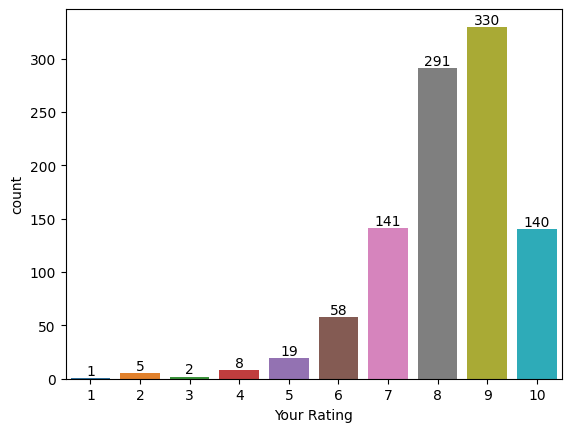

In [ ]:
ax = sns.countplot(x=imdb["Your Rating"])
for bars in ax.containers:
    ax.bar_label(bars)

**Above countplot shows the distribution of ratings given to the content**

<Axes: xlabel='Your Rating', ylabel='IMDb Rating'>

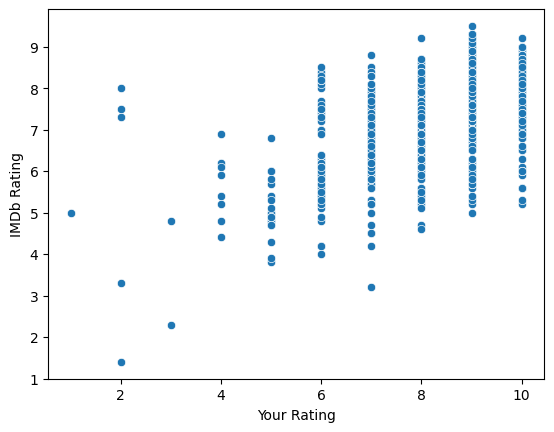

In [ ]:
sns.scatterplot(data=imdb, x="Your Rating", y="IMDb Rating")

**Above plot shows that their is no corelation between user rating and the imdb rating. For example, content rated 10 by the user has IMDb rating ranging from 5 till 9.**

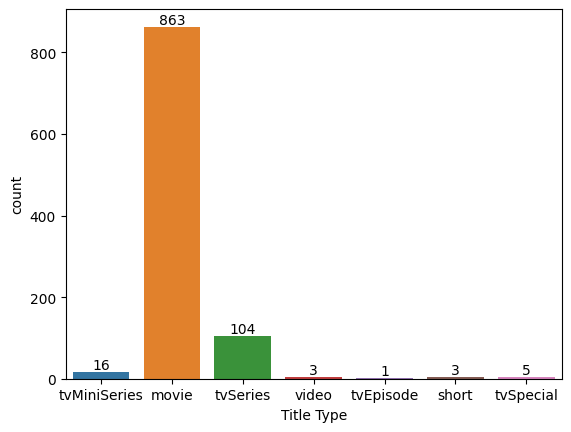

In [ ]:
ax = sns.countplot(x=imdb["Title Type"])
for bars in ax.containers:
    ax.bar_label(bars)

**Above countplot indicated the type of content watched the most- that is, movies.**

In [ ]:
def get_year(dates):    #function to extract year from the 'Date Rated' column
  return dates.year

In [ ]:
imdb.insert(imdb.columns.get_loc('Date Rated')+1, 'Rated(Year)', imdb['Date Rated'].apply(get_year))  #Applied the above function to 'Date Rated' column and inserts a new column thus created next to the 'Date Rated' column

In [ ]:
imdb['Rated(Year)'].dtype

dtype('int64')

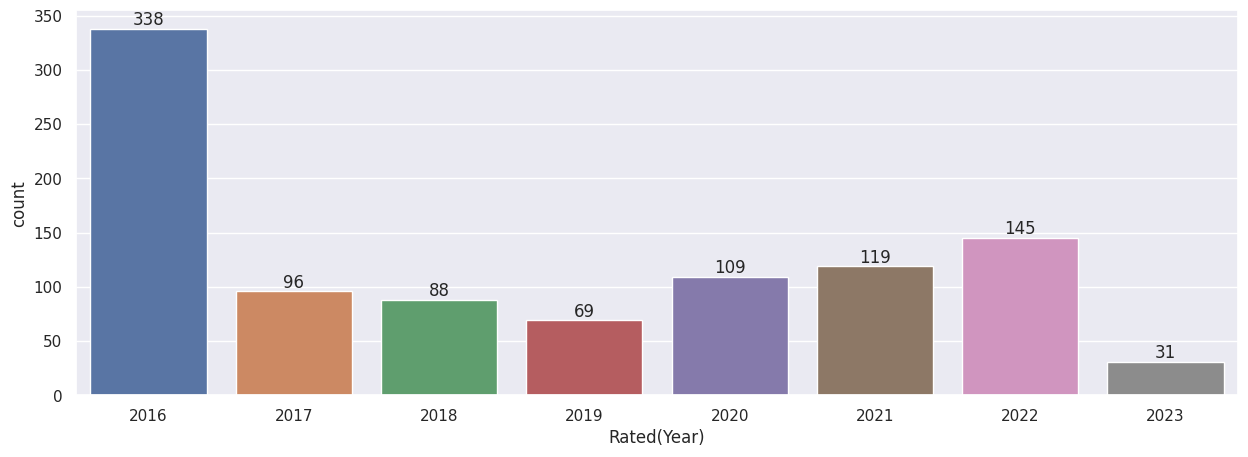

In [ ]:
ax = sns.countplot(x=imdb['Rated(Year)'])
for bars in ax.containers:
    ax.bar_label(bars)

**Most titles were rated in 2016 (338); while 2023 was the least active year, where only 31 titles were rated.**

In [ ]:
def get_month(dates):   #extract month from the 'Date Rated' column
  return dates.month

In [ ]:
imdb.insert(imdb.columns.get_loc('Date Rated')+1, 'Rated(Month)', imdb['Date Rated'].apply(get_month))  #Applied the above function to 'Date Rated' column and inserts a new column thus created next to the 'Date Rated' column

In [ ]:
imdb.sample()

,Id,Your Rating,Date Rated,Rated(Month),Rated(Year),Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Directors
111,tt11651550,8,2021-07-17,7,2021,Operation Java,movie,8.1,146.0,2021,"Crime, Drama, Thriller",4654,Sudhi Maddison


In [ ]:
start = imdb[imdb['Rated(Year)'] == 2016]   #Get the subset of the data, where titles were rated in 2016

In [ ]:
most_rated_months = start['Rated(Month)'].value_counts()  #Find the monthwise count of titles rated

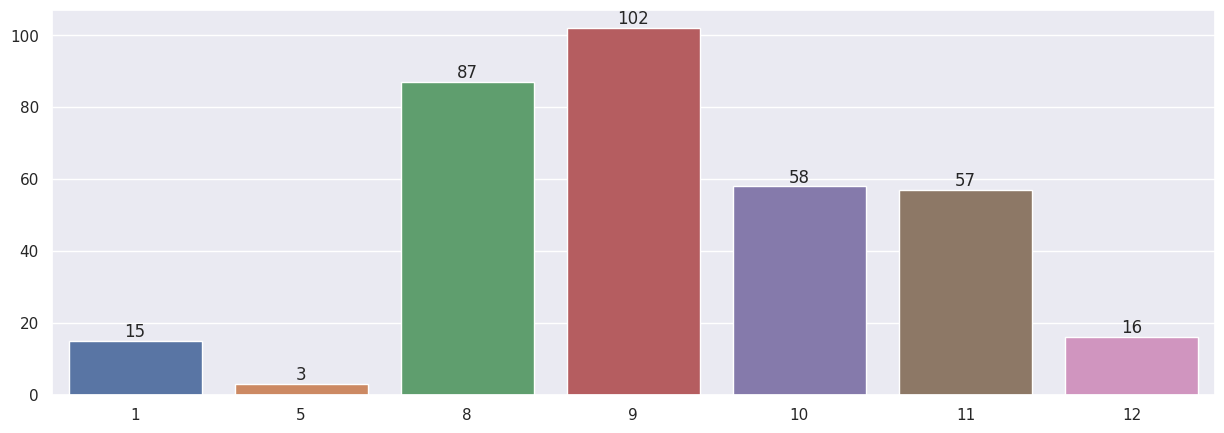

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x=most_rated_months.index, y=most_rated_months.values)
for bars in ax.containers:
    ax.bar_label(bars)

**Above barplot shows that most of the titles were rated in 9th month (September), whereas 5th month (May) was the least busy.**

In [ ]:
def extract_one_director(director):   #Function to extract only the first director from a string of names in the 'Directors' column
  dir = director.split(',', 1)[0]
  return dir

In [ ]:
imdb['Directors'].unique()

array(['Not Available', 'Loveleen Tandan, Danny Boyle',
       'Abbas Alibhai Burmawalla, Mastan Alibhai Burmawalla',
       'Anas Khan, Akhil Paul', 'Sudha Kongara',
       'Saurabh Choubey, Prakash Jha', 'Mohit Suri', 'Swaroop Rsj',
       'Rajeev Barnwal, Jaspal Singh Sandhu', 'Ben Affleck', 'Farah Khan',
       'Shoojit Sircar', 'Rakesh Roshan', 'Jonathan Demme',
       'Vishnuvardhan', 'Hitesh Kewalya', 'Anubhav Sinha',
       'Shoojit Sircar, Kuran Dhillon', 'Pandiraj', 'Ben Sombogaart',
       'Chad Stahelski', 'Kamal K.M.', 'Rohit Shetty', 'Rob Reiner',
       'Rajesh Krishnan', 'David Yarovesky', 'Quentin Tarantino',
       'Venkat Ramji', 'Lokesh Kanagaraj', 'Taika Waititi',
       'Karthik Subbaraj', 'Madonne Ashwin', 'Jeymes Samuel',
       'Prashanth Neel', 'Mani Ratnam', 'Cibi Chakravarthi',
       'Midhun Manuel Thomas', 'Sam Mendes', 'Hernán Jiménez',
       'Digpal Lanjekar', 'Sriram Raghavan', 'Anil Ravipudi',
       'Steven Spielberg', 'H. Vinoth', 'Vivek Agnihotri',

In [ ]:
imdb['Directors'] = imdb['Directors'].apply(extract_one_director)   #Applying the above function

In [ ]:
imdb['Directors'].unique()  #Changes visible in the values, as all are single names

array(['Not Available', 'Loveleen Tandan', 'Abbas Alibhai Burmawalla',
       'Anas Khan', 'Sudha Kongara', 'Saurabh Choubey', 'Mohit Suri',
       'Swaroop Rsj', 'Rajeev Barnwal', 'Ben Affleck', 'Farah Khan',
       'Shoojit Sircar', 'Rakesh Roshan', 'Jonathan Demme',
       'Vishnuvardhan', 'Hitesh Kewalya', 'Anubhav Sinha', 'Pandiraj',
       'Ben Sombogaart', 'Chad Stahelski', 'Kamal K.M.', 'Rohit Shetty',
       'Rob Reiner', 'Rajesh Krishnan', 'David Yarovesky',
       'Quentin Tarantino', 'Venkat Ramji', 'Lokesh Kanagaraj',
       'Taika Waititi', 'Karthik Subbaraj', 'Madonne Ashwin',
       'Jeymes Samuel', 'Prashanth Neel', 'Mani Ratnam',
       'Cibi Chakravarthi', 'Midhun Manuel Thomas', 'Sam Mendes',
       'Hernán Jiménez', 'Digpal Lanjekar', 'Sriram Raghavan',
       'Anil Ravipudi', 'Steven Spielberg', 'H. Vinoth',
       'Vivek Agnihotri', 'Dexter Fletcher', 'Srijit Mukherji',
       'Jon Watts', 'Rajesh Bhatia', 'Prasad Oak', 'Rajkumar Santoshi',
       'Darling Krishn

In [ ]:
imdb1 = imdb[imdb['Directors'] != 'Not Available']    #creating a copy of the data with a condition that directors column has a name

In [ ]:
imdb1['Directors'].value_counts()   #Records the most frequent occurence

Rohit Shetty             12
Priyadarshan             11
Christopher Nolan         9
Anees Bazmee              8
Anurag Kashyap            8
                         ..
Marc Webb                 1
Karan Malhotra            1
Vijay Krishna Acharya     1
Sujay Dahake              1
Sanjay M. Khanduri        1
Name: Directors, Length: 544, dtype: int64

In [ ]:
final = imdb1['Directors'].value_counts()[:5]   #storing first 5 records from the above result

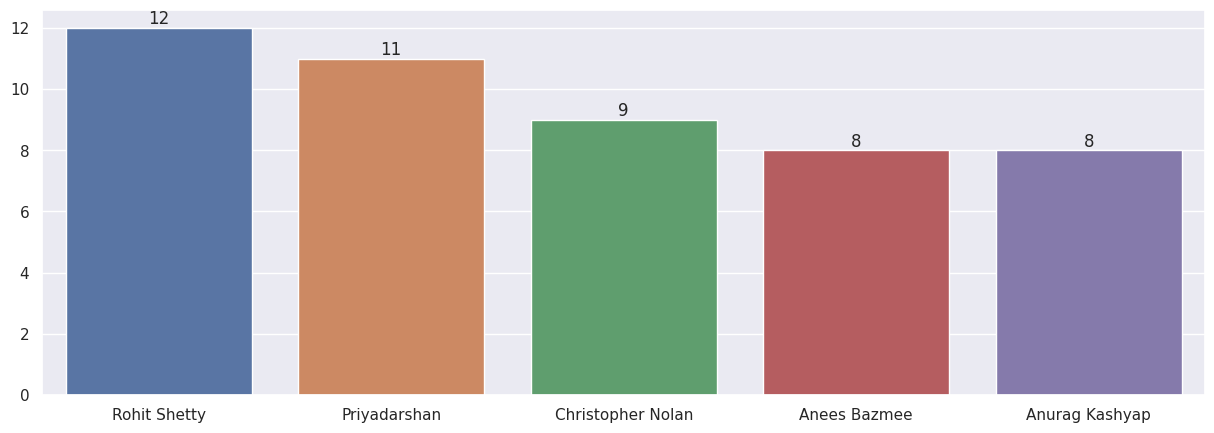

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x=final.index, y=final.values)
for bars in ax.containers:
    ax.bar_label(bars)

**Above barplot reveals the 5 directors whose titles were rated the most. Rohit Shetty is the most preferred director**

In [ ]:
year_of_release = imdb['Year'].value_counts()[:5]   #calculated number of titles released in a year and takes the top 5 years in terms of number

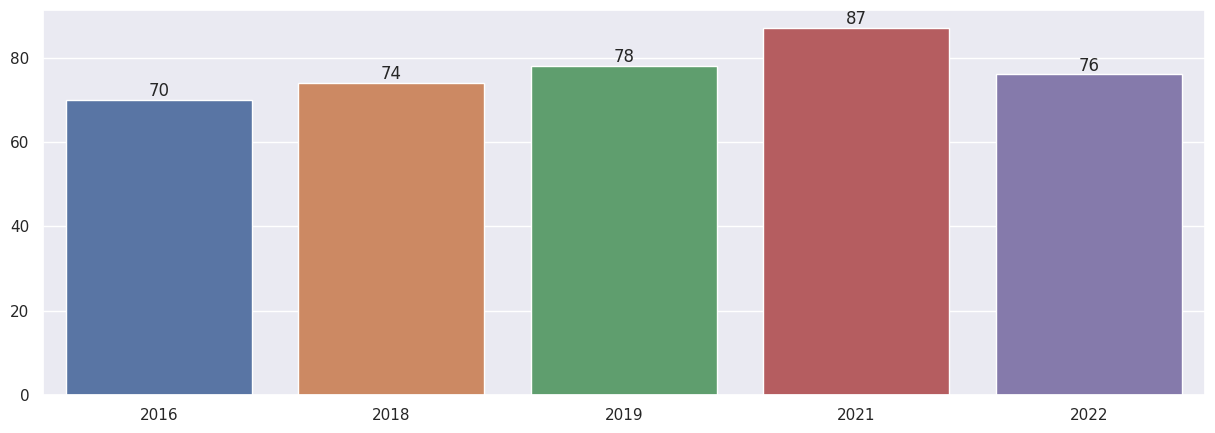

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x=year_of_release.index, y=year_of_release.values)
for bars in ax.containers:
    ax.bar_label(bars)

**Above barplot reveals that most titles were released in 2021 (87)**

In [ ]:
imdb['Genres'].unique()   #Genres column has multiple entries separated by commas

array(['Drama', 'Crime, Drama, Romance',
       'Crime, Drama, Mystery, Thriller', 'Crime, Drama, Mystery',
       'Action, Adventure, Crime, Mystery, Sci-Fi',
       'Action, Crime, Drama, Mystery, Thriller', 'Comedy',
       'Crime, Mystery, Thriller', 'Action, Drama',
       'Action, Crime, Drama, Romance, Thriller',
       'Comedy, Crime, Mystery, Thriller', 'Crime, Drama, Thriller',
       'Action, Adventure, Fantasy', 'Biography, Drama, Thriller',
       'Action, Comedy, Drama, Fantasy, Musical, Romance, Thriller',
       'Biography, Crime, Drama, History', 'Action, Adventure, Sci-Fi',
       'Action, Biography, Drama, War', 'Comedy, Crime, Romance',
       'Comedy, Drama', 'Action, Crime, Drama, Thriller',
       'Action, Crime, Thriller', 'Action, Comedy, Mystery, Thriller',
       'Drama, Thriller', 'Comedy, Crime',
       'Family, Fantasy, Horror, Mystery', 'Crime, Thriller',
       'Action, Adventure, Comedy, Fantasy, Romance, Sci-Fi',
       'Action, Drama, Western', 'Actio

In [ ]:
def extract_one_genre(genres):    #to get the first genre
  gen = genres.split(',', 1)[0]
  return gen

In [ ]:
imdb['Genres'] = imdb['Genres'].apply(extract_one_genre)  #applying the above function

In [ ]:
imdb['Genres'].unique()

array(['Drama', 'Crime', 'Action', 'Comedy', 'Biography', 'Family',
       'Adventure', 'History', 'Animation', 'Mystery', 'Sci-Fi', 'Horror',
       'Thriller', 'Documentary', 'Romance', 'Musical', 'Short'],
      dtype=object)

In [ ]:
most_rated_genres = imdb['Genres'].value_counts()[:5]   #recording the top 5 genres

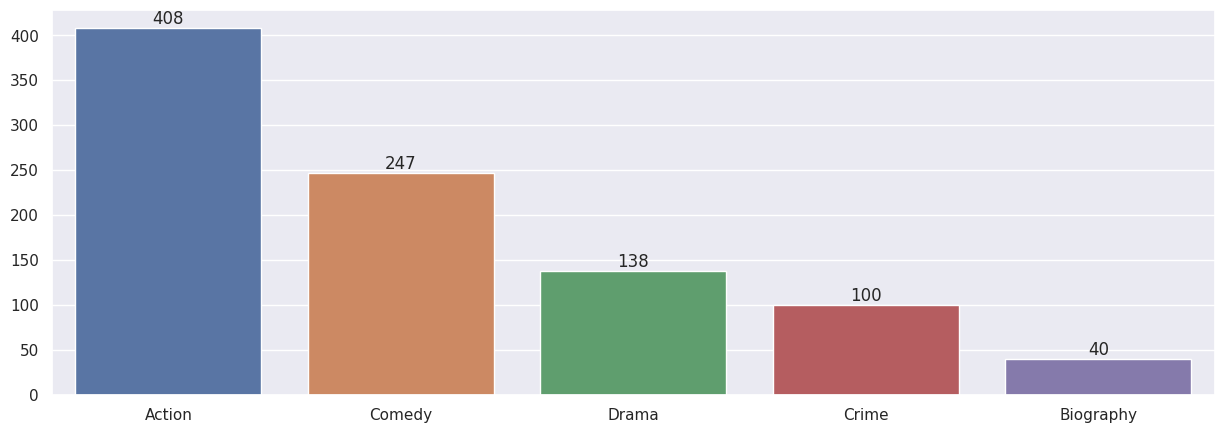

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x=most_rated_genres.index, y=most_rated_genres.values)
for bars in ax.containers:
    ax.bar_label(bars)

**Above plot shows that Action titles were the most preferred media. It's consistent with the pattern of most favourite directors, as 2 of the top 5 directors (Rohit Shetty & Anees Bazmee) make Action movies. Comedy titles being the second most favourite type is justified, as above two directors and Priyadarshan make comedy movies.**

Conclusion of the above EDA
1. movies are the preferred type of titles watched
2. most of the titles were rated in September 2016
3. Rohit Shetty is the favourite director, and action titles were rated the most
4. on average, it takes 3 days to watch one title.
5. most of the titles rated were released in 2021